#Prepare a classification model using SVM for salary  

In [2]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OrdinalEncoder
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

In [4]:
import pandas as pd
# Read the Excel file
train_data = pd.read_csv('SalaryData_Train(1).csv')
# Display the first few rows of the dataset
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData_Test(1).csv to SalaryData_Test(1) (1).csv


In [5]:
import pandas as pd
# Read the Excel file
test_data  = pd.read_csv('SalaryData_Test(1).csv')
# Display the first few rows of the dataset
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [19]:
# Combine train and test data for consistent preprocessing
combined_data = pd.concat([train_data, test_data], ignore_index=True)
combined_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


#EDA

In [21]:
# Summary statistics of the numerical columns
combined_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [23]:
combined_data.describe(include=object)

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
count,45221,45221,45221,45221,45221,45221,45221,45221,45221
unique,7,16,7,14,6,5,2,40,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33306,14783,21055,6020,18666,38902,30527,41292,34013


In [24]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [26]:
combined_data.shape

(45221, 14)

# To deal with duplicated values

In [27]:
#finding duplicates
combined_data.duplicated().sum()

5982

In [29]:
#Drop Duplicated records
combined_data.drop_duplicates(inplace=True)

In [30]:
combined_data.duplicated().sum()

0

In [32]:
#finding missing values
combined_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

#Analysing data

Text(0.5, 1.0, 'Correlation Map')

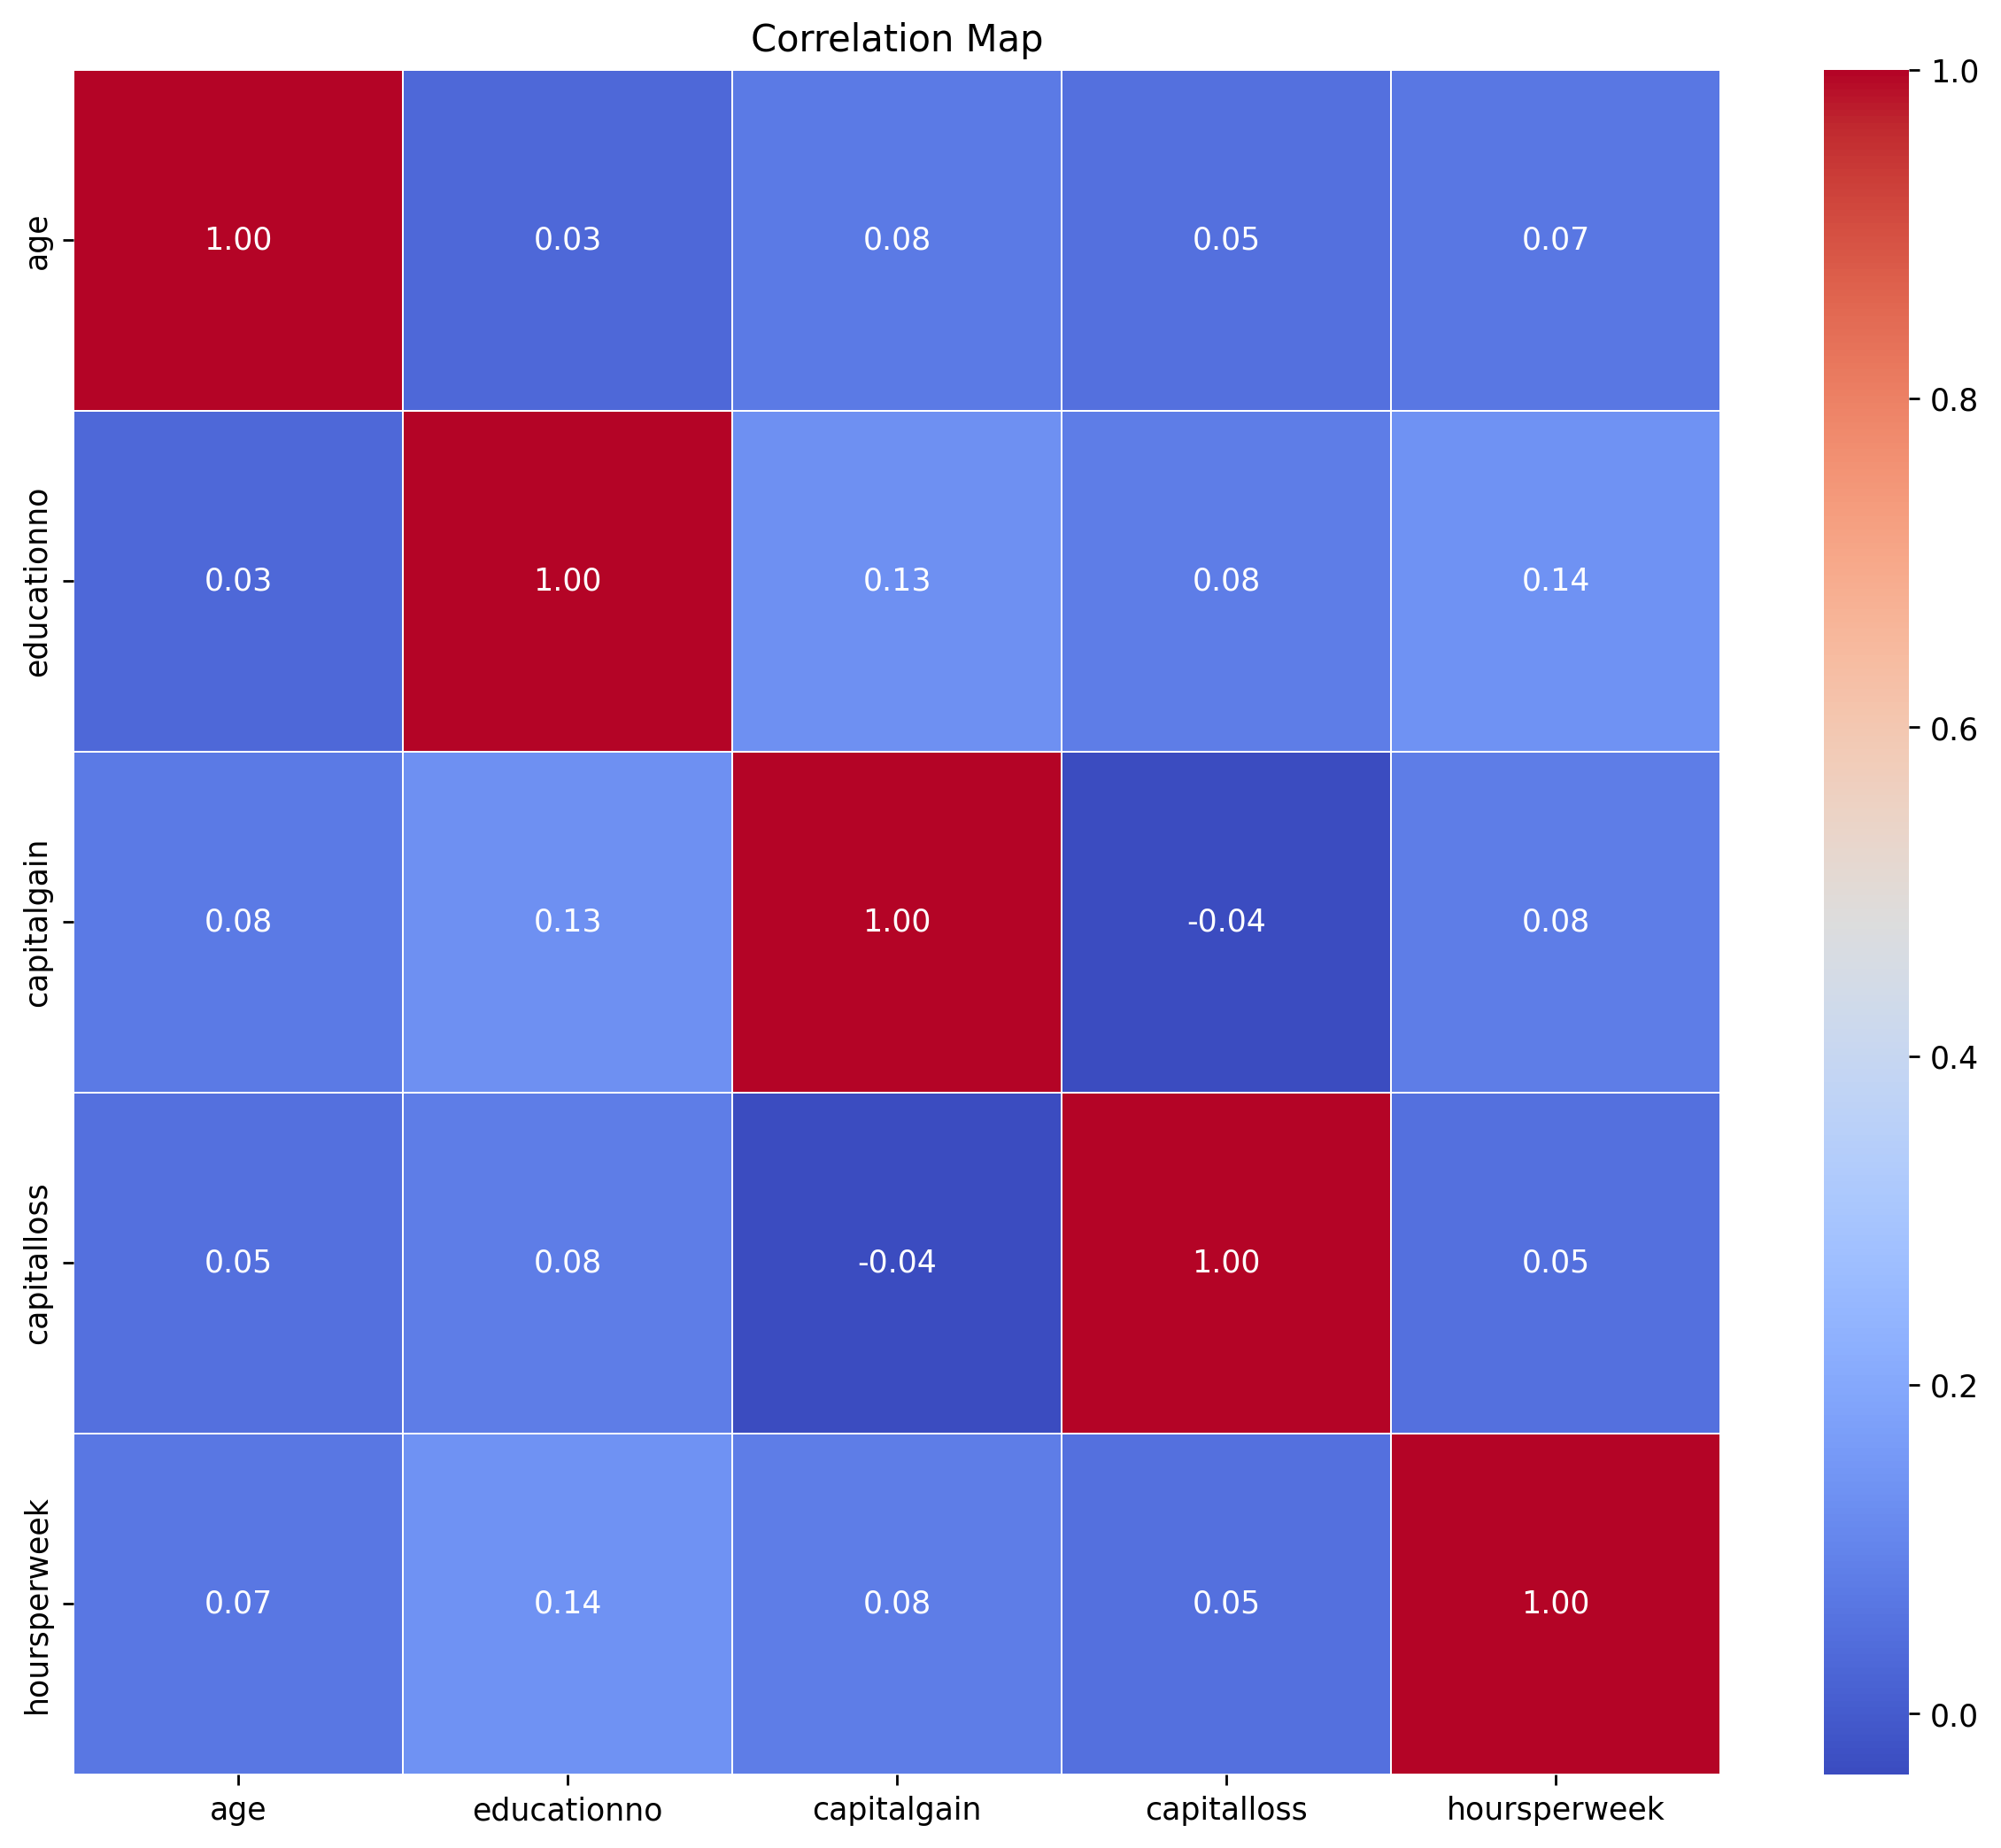

In [36]:
# Assuming df is your DataFrame containing numerical columns
s = combined_data.select_dtypes(include="number").corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
# Create a heatmap with a diverging color map and display the correlation coefficients
sns.heatmap(s, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
# Add a title
plt.title("Correlation Map")

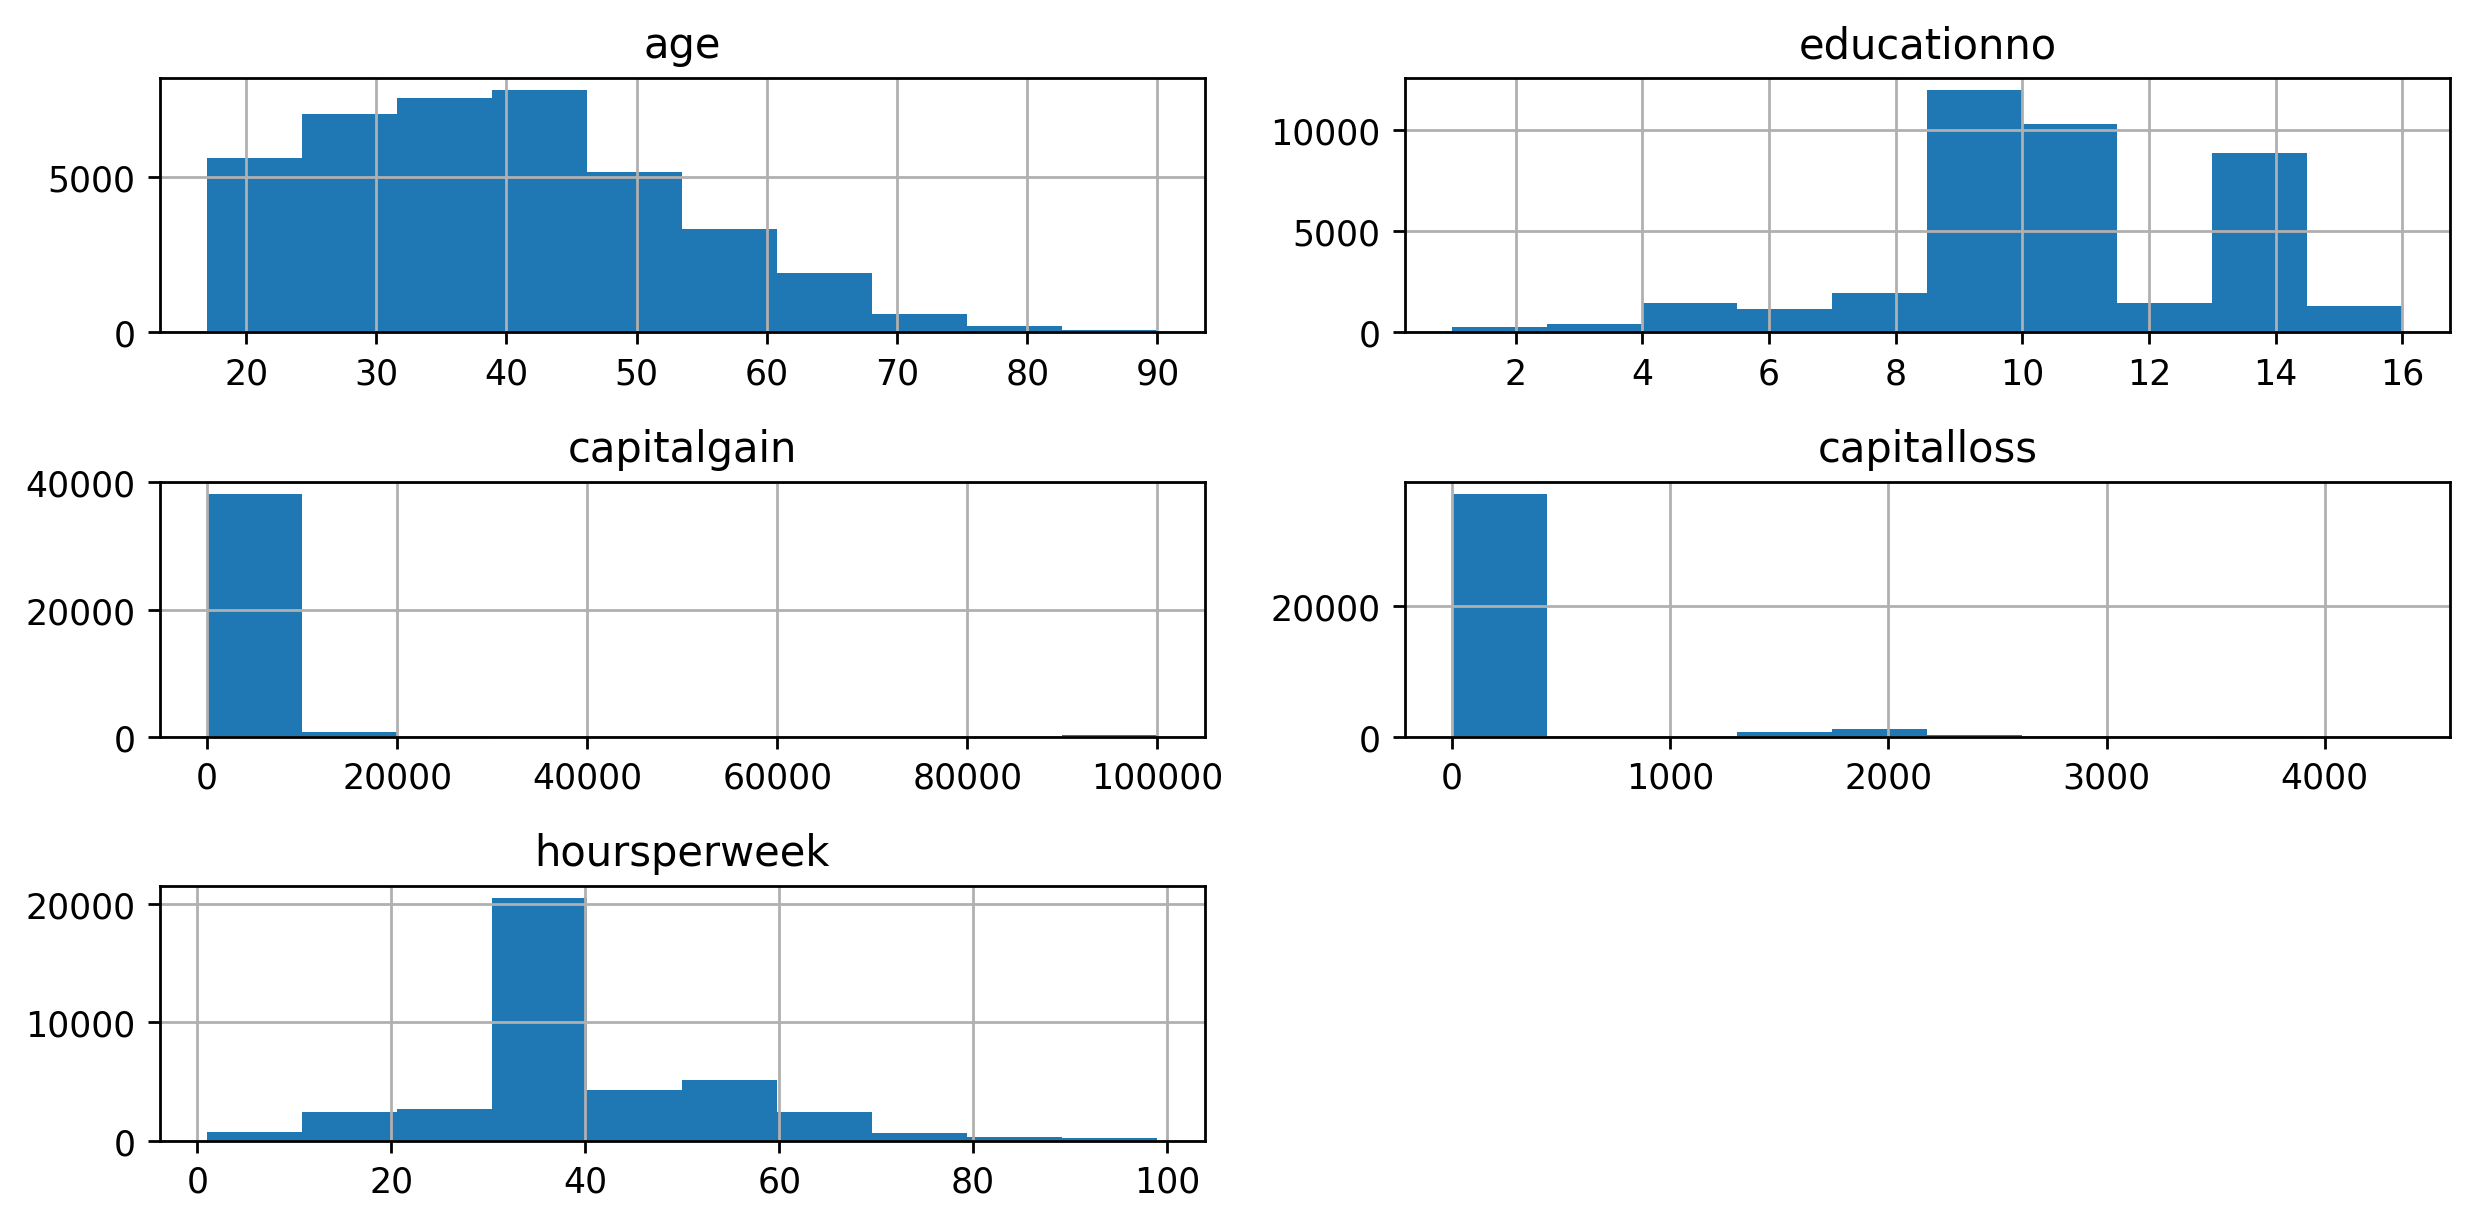

In [38]:
combined_data.hist()
plt.tight_layout()

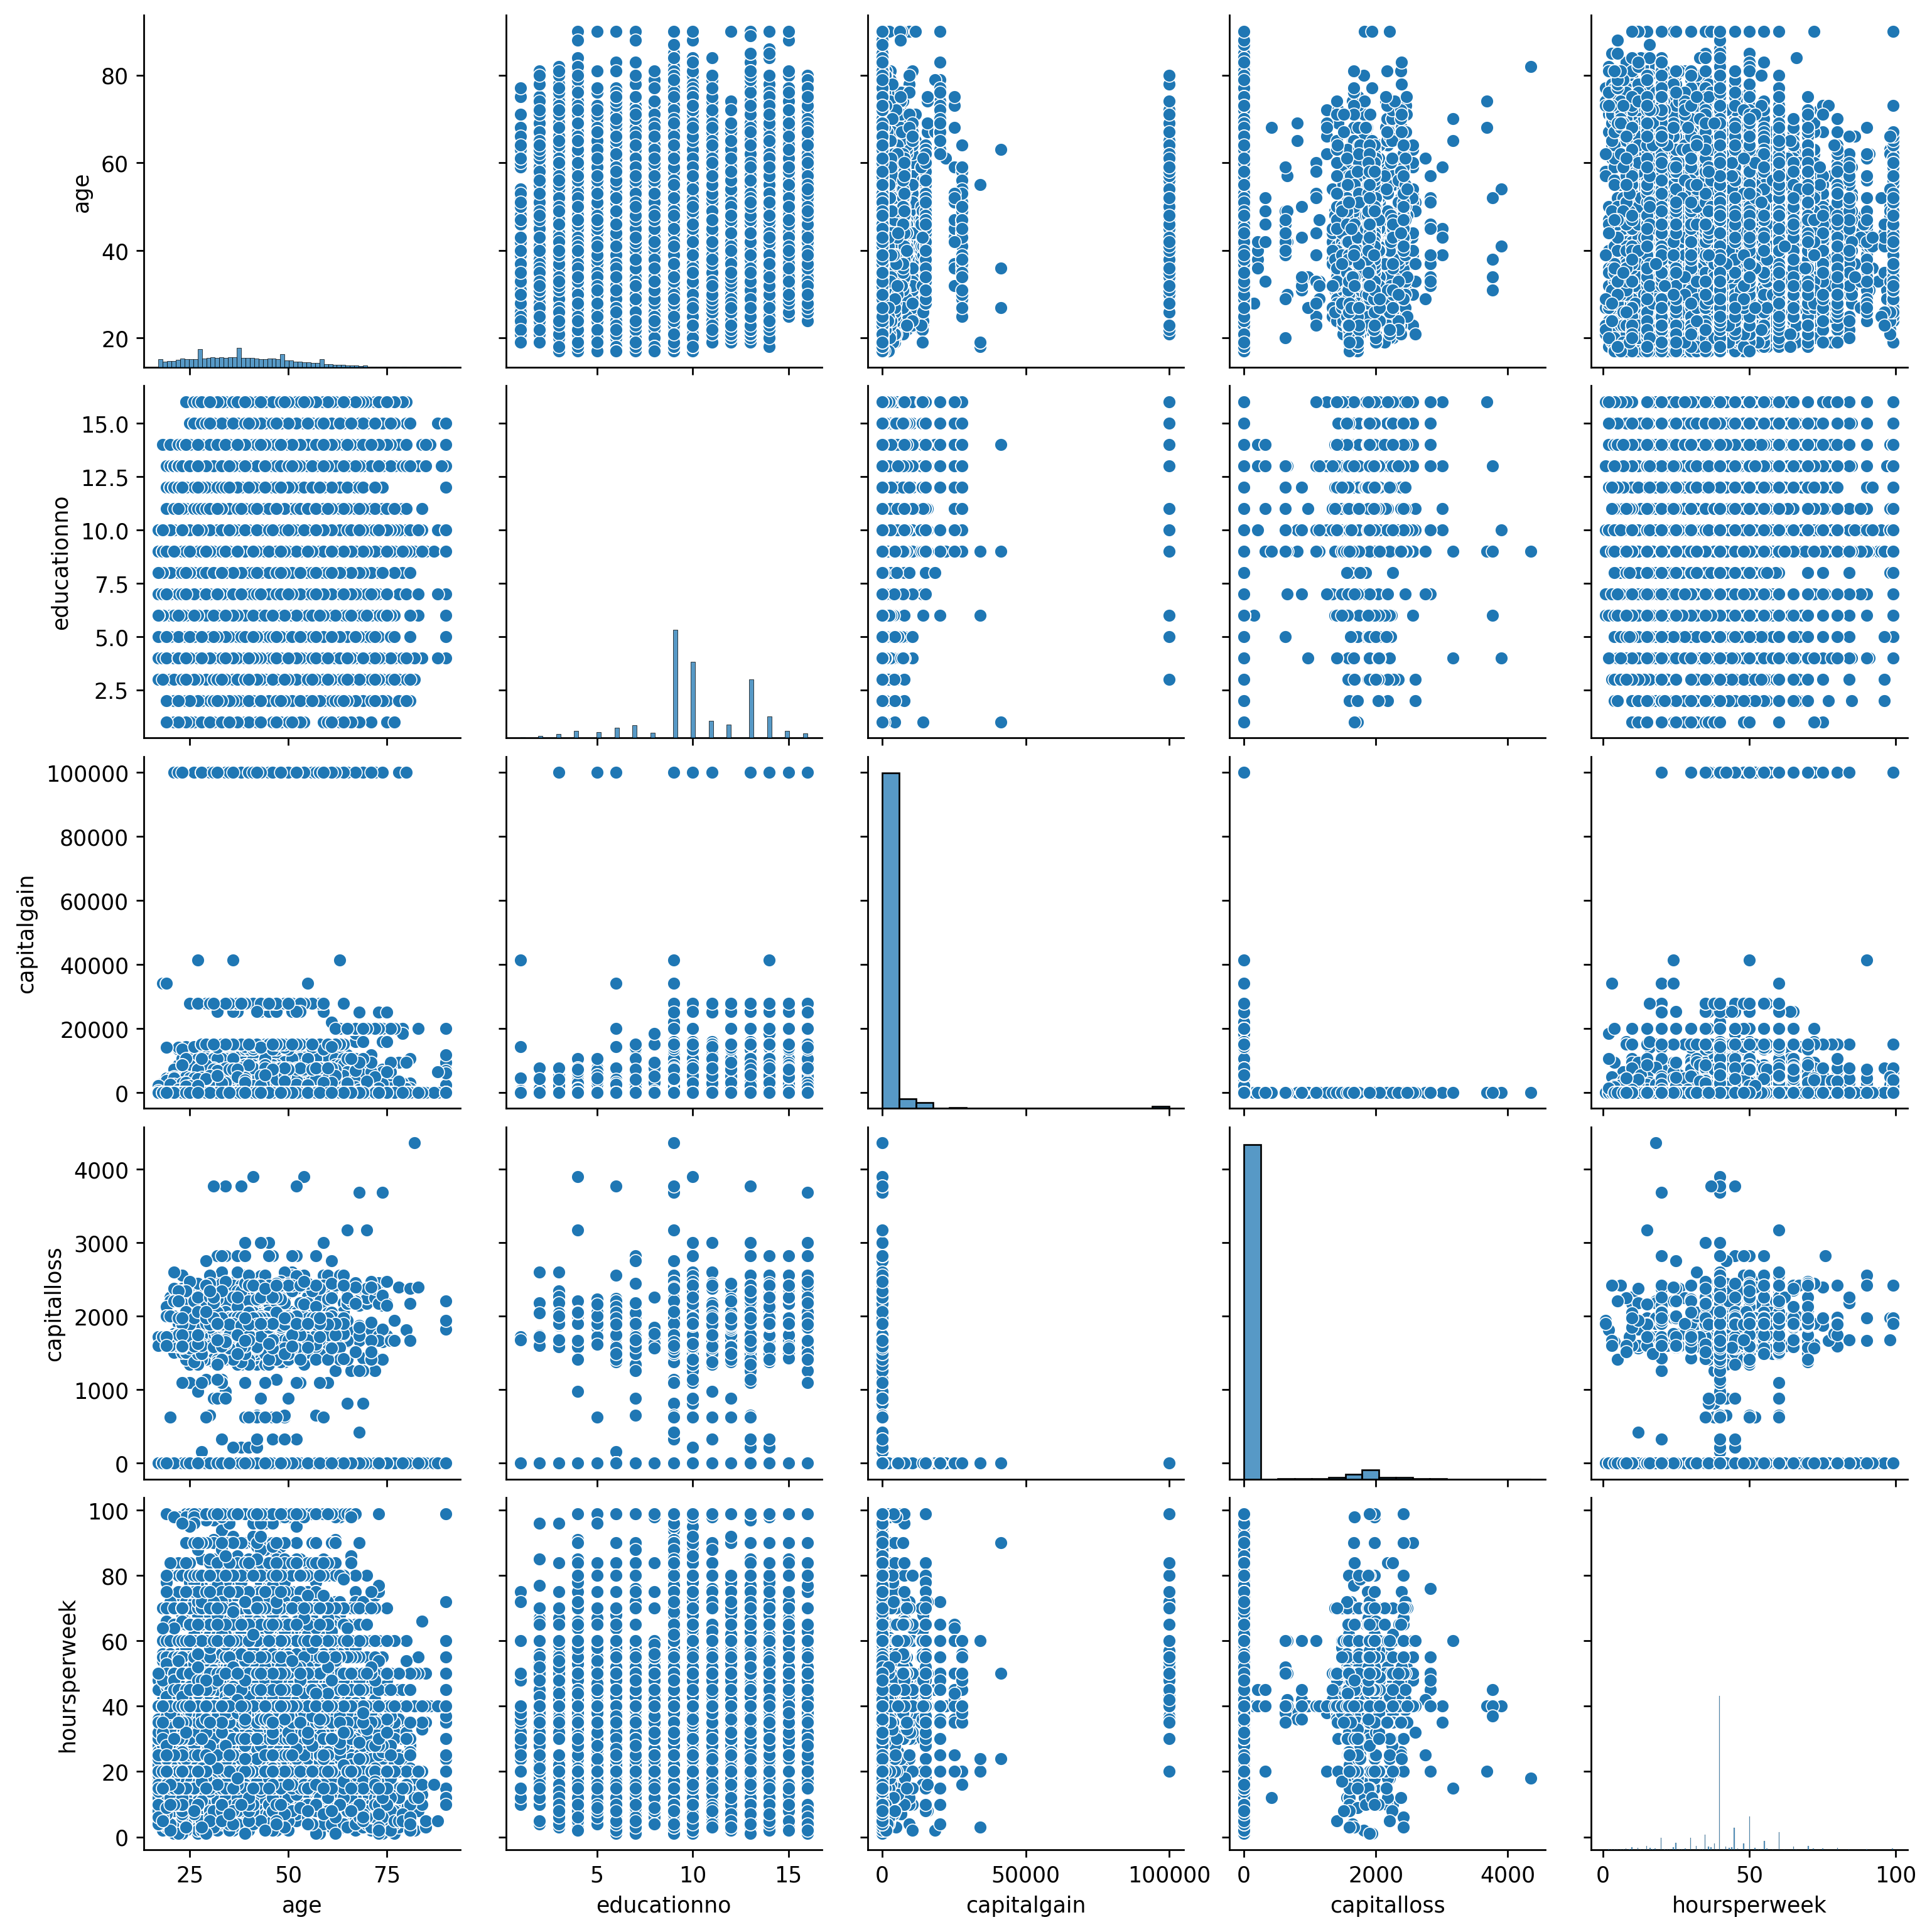

In [39]:
sns.pairplot(combined_data)

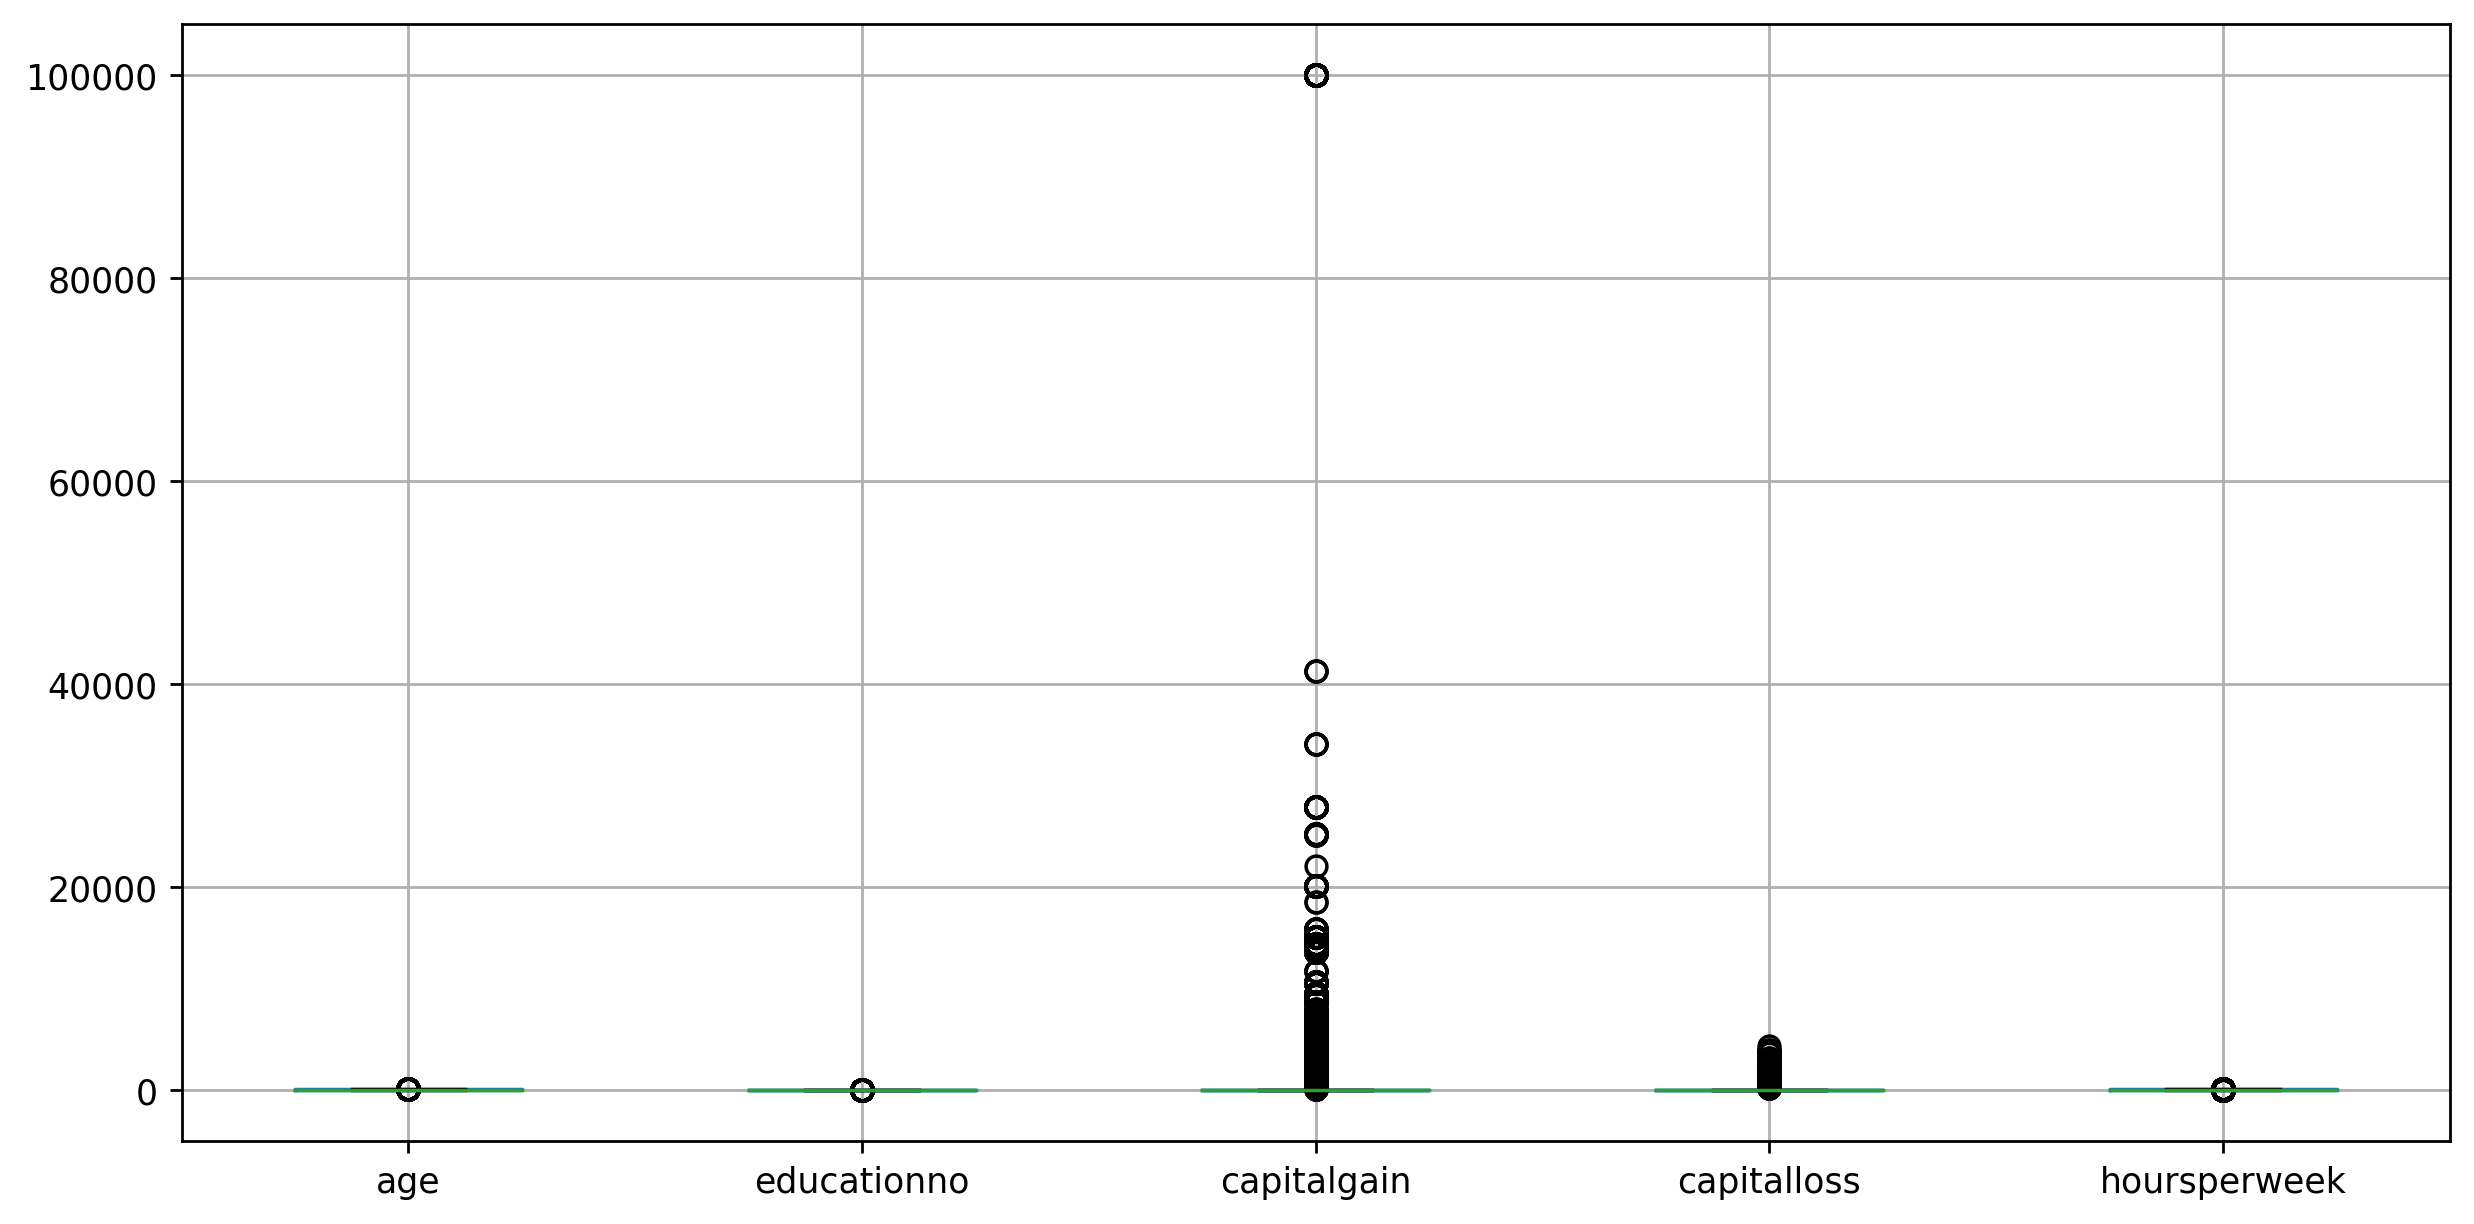

In [40]:
combined_data.boxplot()
plt.tight_layout()

# for delete outliers

In [41]:
combined_data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [46]:
import numpy as np

def calculate_whisker(column):
    if pd.api.types.is_numeric_dtype(column):
        q1 = column.quantile(0.25)
        q3 = column.quantile(0.75)
        iqr = q3 - q1
        lw = q1 - 1.5 * iqr
        uw = q3 + 1.5 * iqr
        return lw, uw
    else:
        return None

# Loop through the list and replace outliers
for i in ['age', 'educationno', 'maritalstatus', 'capitalgain', 'capitalloss', 'hoursperweek']:
    column = combined_data[i]
    whisker = calculate_whisker(column)

    if whisker is not None:
        lw, uw = whisker
        combined_data[i] = np.where(combined_data[i] < lw, lw, combined_data[i])
        combined_data[i] = np.where(combined_data[i] > uw, uw, combined_data[i])


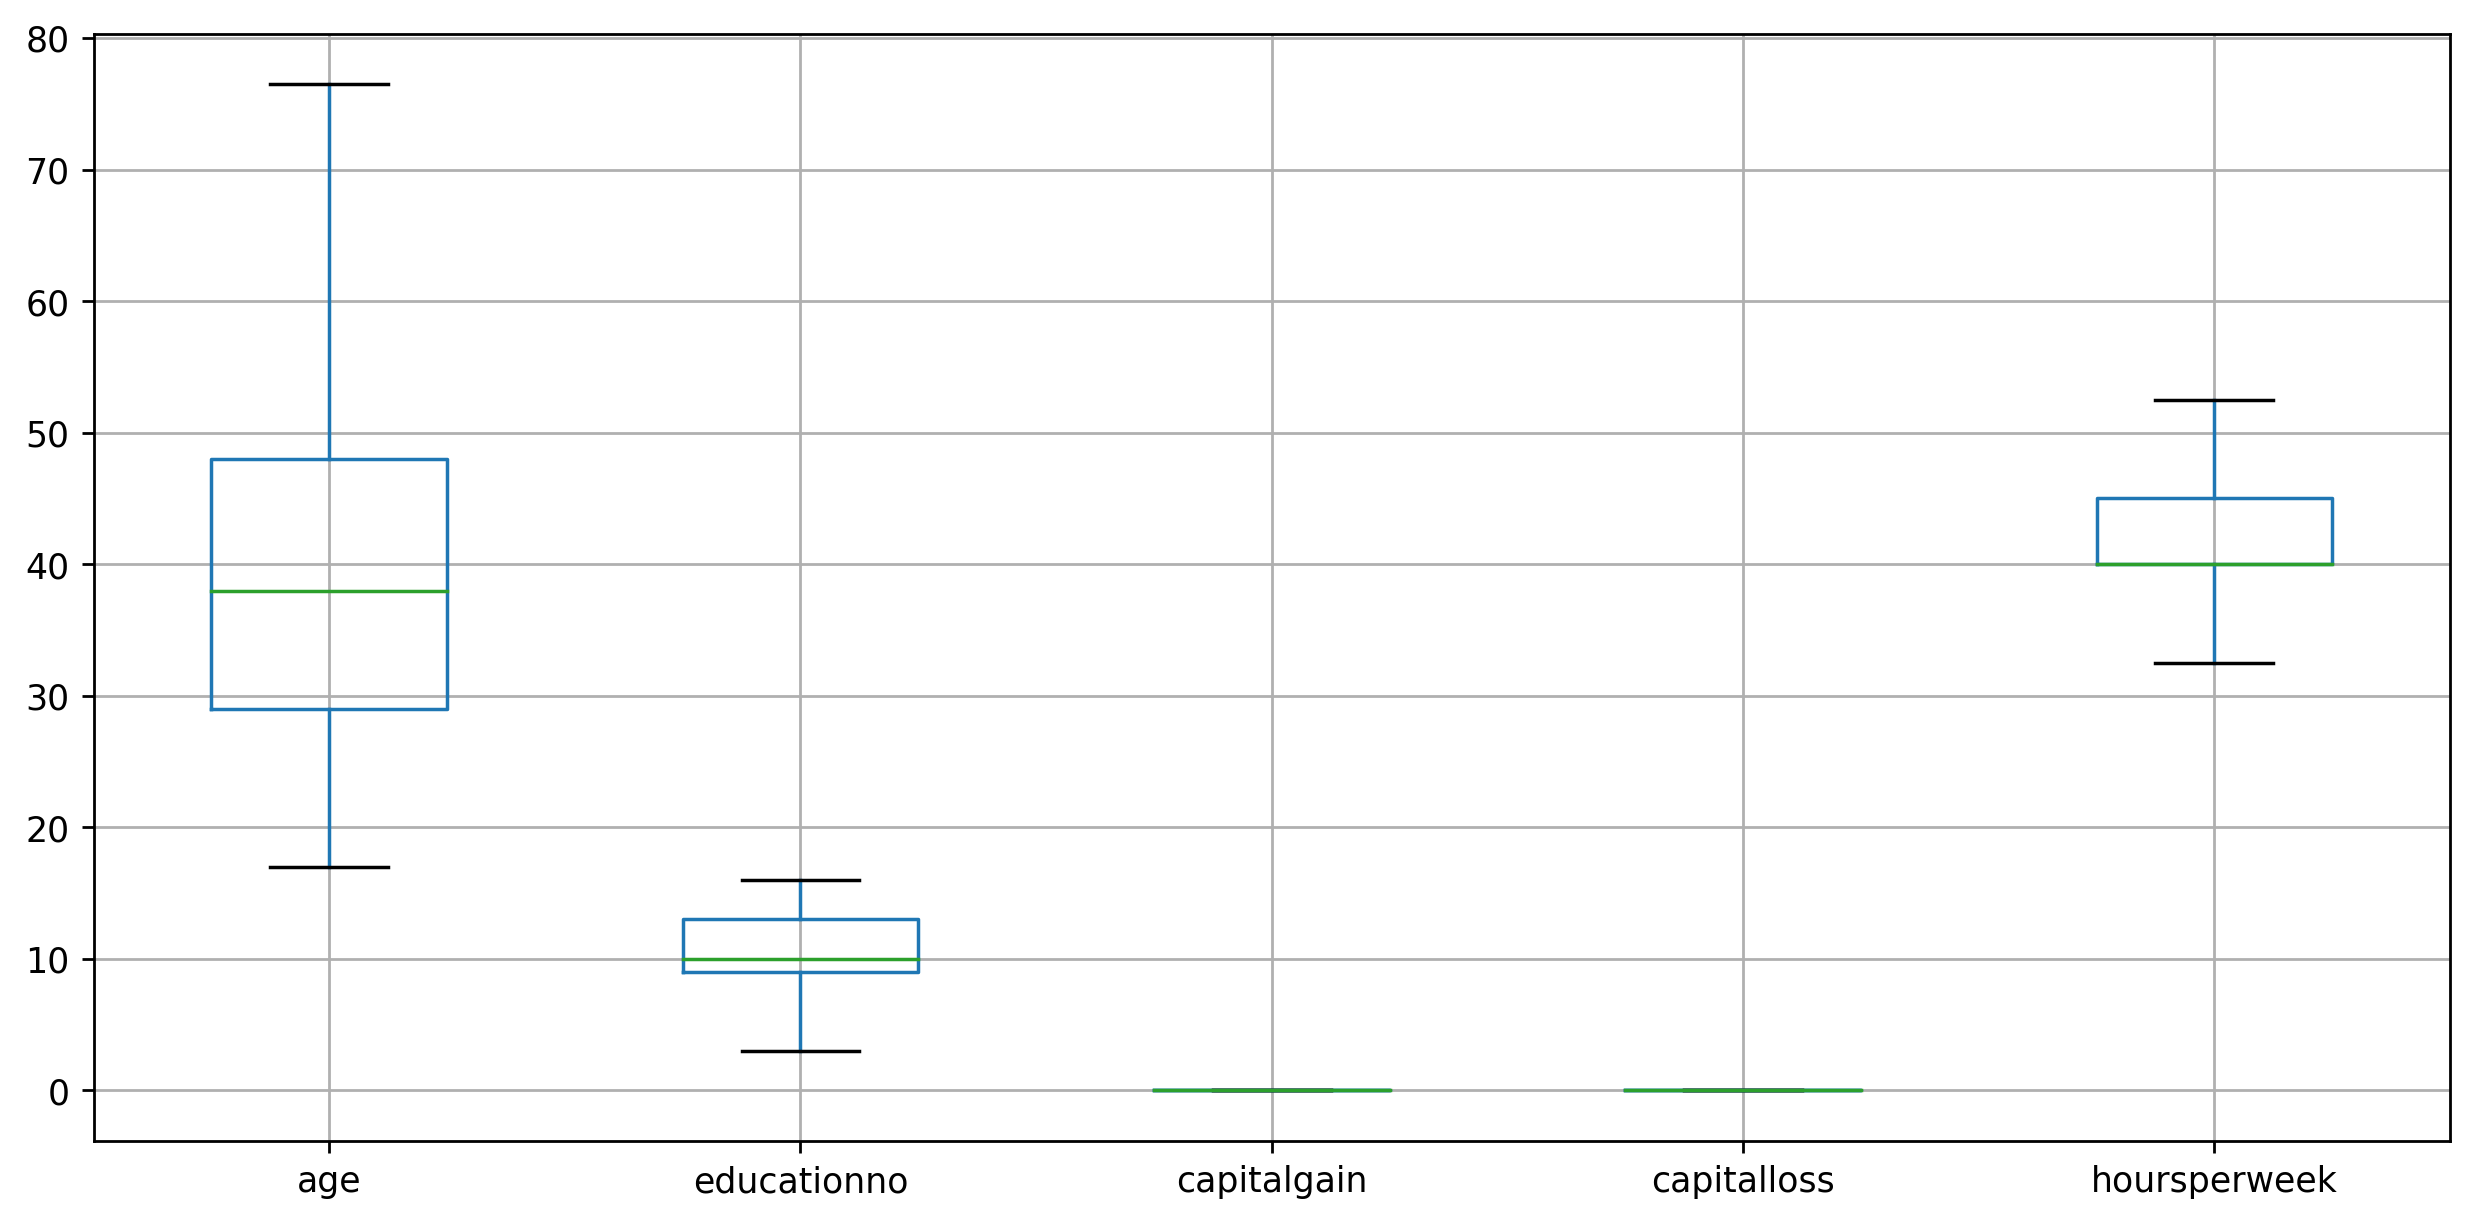

In [47]:
combined_data.boxplot()
plt.tight_layout()

#model building

In [48]:
# Split the data back into train and test sets
train_data_no_outliers = combined_data_no_outliers.iloc[:train_data.shape[0]]
test_data_no_outliers = combined_data_no_outliers.iloc[train_data.shape[0]:]

In [49]:
# Separate features (X) and target variable (y) for training and testing sets
X_train = train_data_no_outliers.drop('Salary', axis=1)
y_train = train_data_no_outliers['Salary']

In [50]:
X_test = test_data_no_outliers.drop('Salary', axis=1)
y_test = test_data_no_outliers['Salary']

In [51]:
# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()

In [52]:
categorical_columns = ['workclass', 'education', 'maritalstatus',
                       'occupation', 'relationship', 'race', 'sex', 'native']

for column in categorical_columns:
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])

In [62]:
# Create and train the SVM model
svm_model = SVC(kernel='poly')
svm_model.fit(X_train, y_train)

SVC(kernel='poly')

In [63]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

In [64]:
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [65]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

In [66]:
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_result)

Accuracy: 0.8074715105817839
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.80      1.00      0.89      9021
        >50K       0.95      0.16      0.27      2650

    accuracy                           0.81     11671
   macro avg       0.88      0.58      0.58     11671
weighted avg       0.84      0.81      0.75     11671



In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Perform k-fold cross-validation
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)

# Display cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.8083872  0.80487401 0.80520557 0.8058687  0.80918435]
Mean Cross-Validation Score: 0.8067039659415215
